In [ ]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings  # HuggingFace嵌入

load_dotenv("../.env")

model = ChatOpenAI(
                    temperature=0,
                    max_tokens=4096,
                    presence_penalty=1.2,
                    # model='deepseek-chat',
                    # openai_api_key=os.getenv('DEEPSEEK_API_KEY'),
                    # openai_api_base="https://api.deepseek.com/v1",
                    model='gpt-4o-mini',
                    openai_api_key=os.getenv('CLOSEAI_API_KEY'),
                    openai_api_base="https://api.openai-proxy.org/v1",
                )

# model = ChatOllama(
#                     temperature=0,
#                     num_predict=4096,
#                     repeat_penalty=1.2,
#                     model="llama3.2:3b"
#                 )

embedding = HuggingFaceEmbeddings(
            model_name="../../../../Embedding/maidalun/bce-embedding-base_v1",
            model_kwargs={"device": "cuda",
                          "trust_remote_code": True},
            encode_kwargs={"normalize_embeddings": True},
        )

# Define and use the graph

In [2]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict


# Define the schema for the input
class InputState(TypedDict):
    question: str


# Define the schema for the output
class OutputState(TypedDict):
    answer: str


# Define the overall schema, combining both input and output
class OverallState(InputState, OutputState):
    pass


# Define the node that processes the input and generates an answer
def answer_node(state: InputState):
    # Example answer and an extra key
    return {"answer": "bye", "question": state["question"]}


# Build the graph with input and output schemas specified
builder = StateGraph(OverallState, input=InputState, output=OutputState)
builder.add_node(answer_node)  # Add the answer node
builder.add_edge(START, "answer_node")  # Define the starting edge
builder.add_edge("answer_node", END)  # Define the ending edge
graph = builder.compile()  # Compile the graph



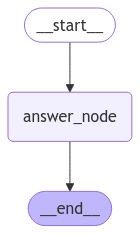

In [3]:
graph

In [4]:
# Invoke the graph with an input and print the result
print(graph.invoke({"question": "hi"}))

{'answer': 'bye'}
